In [121]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup


b'<!DOCTYPE html><html lang="es"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1"/><link rel="preload" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" as="font" crossorigin="" type="font/woff2"/><link rel="preload" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" as="font" crossorigin="" type="font/woff2"/><link rel="preload" as="image" href="/hera/icons/home.svg"/><link rel="preload" as="image" href="/hera/icons/filters/car.svg"/><link rel="preload" as="image" href="/hera/icons/filters/motorbike.svg"/><link rel="preload" as="image" href="/hera/icons/favourite.svg"/><link rel="preload" as="image" href="/hera/icons/C.svg"/><link rel="preload" as="image" href="/hera/icons/ribbon.svg"/><link rel="preload" as="image" href="/hera/icons/0_EMISIONES.svg"/><link rel="preload" as="image" href="/hera/icons/adSell.svg" fetchPriority="high"/><link rel="preload" as="image" href="/hera/icons/B.svg"/><link rel="preload" as="image" h
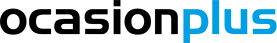

In [122]:
# definimos la url de la página de la vamos a sacar datos
url_coches = "https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular"
# hacemos la request a la página de la que queremos sacar la info
res_coche = requests.get(url_coches)
print(res_coche.content)

In [123]:
if res_coche.status_code == 200:
    print(f" La respuesta de la petición es: {res_coche.status_code}")
else:
    print("None")    


 La respuesta de la petición es: 200


<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="image" href="/hera/icons/home.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/car.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/>
  <link as="image" href="/hera/icons/favourite.svg" rel="preload"/>
  <link as="image" href="/hera/icons/C.svg" rel="preload"/>
  <link as="image" href="/hera/icons/ribbon.svg" rel="preload"/>
  <link as="image" href="/hera/icons/0_EMISIONES.svg" rel="preload"/>
  <link as="image" fetchpriority="high" href="/hera/icons/adSell.svg" rel="preload"/>
  <link as="image" href="/hera/icons/B.svg" rel="pr
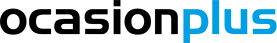

In [124]:
# creamos el objeto BeautifulSoup para poder acceder al contenido solicitado
sopa_coche = BeautifulSoup(res_coche.content, 'html.parser')
print(sopa_coche.prettify())

In [125]:
# sacamos los nombres de los coches
lista_nombre_coche = sopa_coche.find_all("h2", {"class": "cardVehicle_column_text__EvQkB"})

print("El resultado del método '.find_all()' es: \n",   lista_nombre_coche)
lista_nombre_coche


El resultado del método '.find_all()' es: 
 [<h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">Skoda Fabia</span><span class="cardVehicle_finance__SG6JV">1.2 Urban 51 kW (69 CV)</span></h2>, <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">Audi A3</span><span class="cardVehicle_finance__SG6JV">Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic</span></h2>, <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">BMW Serie 1</span><span class="cardVehicle_finance__SG6JV">116d (116 CV) Pack M</span></h2>, <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">Fiat 500</span><span class="cardVehicle_finance__SG6JV">1.2 8v Lounge (69 CV)</span></h2>, <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">Audi A3</span><span class="cardVehicle_finance__SG6JV">Sportback 30 TDI S line S-tronic 85 kW (116 CV)</span></h2>, <h2 class="cardVehicle

[<h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">Skoda Fabia</span><span class="cardVehicle_finance__SG6JV">1.2 Urban 51 kW (69 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">Audi A3</span><span class="cardVehicle_finance__SG6JV">Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">BMW Serie 1</span><span class="cardVehicle_finance__SG6JV">116d (116 CV) Pack M</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">Fiat 500</span><span class="cardVehicle_finance__SG6JV">1.2 8v Lounge (69 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx">Audi A3</span><span class="cardVehicle_finance__SG6JV">Sportback 30 TDI S line S-tronic 85 kW (116 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardV

In [126]:
nombres_coches = [] # es el momento de sacar la información útil del método que hemos usado previamente. Para eso lo primero que vamos a hacer es crearnos una lista donde iremos almacenado los resultados que queremos

In [127]:
for i in lista_nombre_coche:
    # utilizamos el método ".getText()" para sacar el texto de cada uno de los elementos y lo apendeamos a la lista que hemos creado previamente. 
    nombres_coches.append(i.getText())

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", nombres_coches)
nombres_coches



--------------------------

Los resultados de extraer el texto de cada uno de los elementos es:
 ['Skoda Fabia1.2 Urban 51 kW (69 CV)', 'Audi A3Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic', 'BMW Serie 1116d (116 CV) Pack M', 'Fiat 5001.2 8v Lounge (69 CV)', 'Audi A3Sportback 30 TDI S line S-tronic 85 kW (116 CV)', 'Seat León1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)', 'Mercedes Clase AMercedes-Benz A 200 d 110 kW (150 CV)', 'Volkswagen GolfSport 2.0 TDI CR BMT (150 CV) DSG', 'Opel Astra2.0 CDTi S&S Selective (165 CV)', 'KIA Stonic1.2 CVVT Eco-Dynamics Drive (84 CV)', 'Volkswagen Golf1.5 TSI Evo (130 CV)', 'Hyundai i301.6 CRDI GLS Style (128 CV)', 'Ford Focus1.5 Ecoblue ST-Line X  (120 CV)', 'Peugeot 3008SUV SUV PureTech 130 Allure EAT8 (130 CV)', 'Peugeot 3008SUV 1.5 BlueHDi  (130CV) S&S Allure', 'Lexus RX450h Luxury  (313 CV)', 'Citroën C3PureTech 110 S&S Feel EAT6 (110 CV)', 'Seat León2.0 TFSI S&S Cupra DSG-7 (290 CV)', 'Hyundai i302.0 TGDI N Performance (280CV

['Skoda Fabia1.2 Urban 51 kW (69 CV)',
 'Audi A3Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic',
 'BMW Serie 1116d (116 CV) Pack M',
 'Fiat 5001.2 8v Lounge (69 CV)',
 'Audi A3Sportback 30 TDI S line S-tronic 85 kW (116 CV)',
 'Seat León1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)',
 'Mercedes Clase AMercedes-Benz A 200 d 110 kW (150 CV)',
 'Volkswagen GolfSport 2.0 TDI CR BMT (150 CV) DSG',
 'Opel Astra2.0 CDTi S&S Selective (165 CV)',
 'KIA Stonic1.2 CVVT Eco-Dynamics Drive (84 CV)',
 'Volkswagen Golf1.5 TSI Evo (130 CV)',
 'Hyundai i301.6 CRDI GLS Style (128 CV)',
 'Ford Focus1.5 Ecoblue ST-Line X  (120 CV)',
 'Peugeot 3008SUV SUV PureTech 130 Allure EAT8 (130 CV)',
 'Peugeot 3008SUV 1.5 BlueHDi  (130CV) S&S Allure',
 'Lexus RX450h Luxury  (313 CV)',
 'Citroën C3PureTech 110 S&S Feel EAT6 (110 CV)',
 'Seat León2.0 TFSI S&S Cupra DSG-7 (290 CV)',
 'Hyundai i302.0 TGDI N Performance (280CV)',
 'Renault Kangoo CombidCi 90 Extrem Energy (90 CV)']

In [128]:
coche =[] # creamos una lista vacía donde almacenaremos todos los nombres que hemos extraído de la página web
for i in lista_nombre_coche: #iterar sobre la lista para sacar los nombres de todos los productos
   
   coche.append(i.getText())  # usando el método ".getText()" sacamos el precio

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", coche)

coche



--------------------------

Los resultados de extraer el texto de cada uno de los elementos es:
 ['Skoda Fabia1.2 Urban 51 kW (69 CV)', 'Audi A3Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic', 'BMW Serie 1116d (116 CV) Pack M', 'Fiat 5001.2 8v Lounge (69 CV)', 'Audi A3Sportback 30 TDI S line S-tronic 85 kW (116 CV)', 'Seat León1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)', 'Mercedes Clase AMercedes-Benz A 200 d 110 kW (150 CV)', 'Volkswagen GolfSport 2.0 TDI CR BMT (150 CV) DSG', 'Opel Astra2.0 CDTi S&S Selective (165 CV)', 'KIA Stonic1.2 CVVT Eco-Dynamics Drive (84 CV)', 'Volkswagen Golf1.5 TSI Evo (130 CV)', 'Hyundai i301.6 CRDI GLS Style (128 CV)', 'Ford Focus1.5 Ecoblue ST-Line X  (120 CV)', 'Peugeot 3008SUV SUV PureTech 130 Allure EAT8 (130 CV)', 'Peugeot 3008SUV 1.5 BlueHDi  (130CV) S&S Allure', 'Lexus RX450h Luxury  (313 CV)', 'Citroën C3PureTech 110 S&S Feel EAT6 (110 CV)', 'Seat León2.0 TFSI S&S Cupra DSG-7 (290 CV)', 'Hyundai i302.0 TGDI N Performance (280CV

['Skoda Fabia1.2 Urban 51 kW (69 CV)',
 'Audi A3Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic',
 'BMW Serie 1116d (116 CV) Pack M',
 'Fiat 5001.2 8v Lounge (69 CV)',
 'Audi A3Sportback 30 TDI S line S-tronic 85 kW (116 CV)',
 'Seat León1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)',
 'Mercedes Clase AMercedes-Benz A 200 d 110 kW (150 CV)',
 'Volkswagen GolfSport 2.0 TDI CR BMT (150 CV) DSG',
 'Opel Astra2.0 CDTi S&S Selective (165 CV)',
 'KIA Stonic1.2 CVVT Eco-Dynamics Drive (84 CV)',
 'Volkswagen Golf1.5 TSI Evo (130 CV)',
 'Hyundai i301.6 CRDI GLS Style (128 CV)',
 'Ford Focus1.5 Ecoblue ST-Line X  (120 CV)',
 'Peugeot 3008SUV SUV PureTech 130 Allure EAT8 (130 CV)',
 'Peugeot 3008SUV 1.5 BlueHDi  (130CV) S&S Allure',
 'Lexus RX450h Luxury  (313 CV)',
 'Citroën C3PureTech 110 S&S Feel EAT6 (110 CV)',
 'Seat León2.0 TFSI S&S Cupra DSG-7 (290 CV)',
 'Hyundai i302.0 TGDI N Performance (280CV)',
 'Renault Kangoo CombidCi 90 Extrem Energy (90 CV)']

In [129]:
coche = [elemento.getText() for elemento in lista_nombre_coche if '€' not in elemento.getText()]

print("\n--------------------------\n")
print("Los resultados de extraer el texto de cada uno de los elementos es:\n", coche)



--------------------------

Los resultados de extraer el texto de cada uno de los elementos es:
 ['Skoda Fabia1.2 Urban 51 kW (69 CV)', 'Audi A3Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic', 'BMW Serie 1116d (116 CV) Pack M', 'Fiat 5001.2 8v Lounge (69 CV)', 'Audi A3Sportback 30 TDI S line S-tronic 85 kW (116 CV)', 'Seat León1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)', 'Mercedes Clase AMercedes-Benz A 200 d 110 kW (150 CV)', 'Volkswagen GolfSport 2.0 TDI CR BMT (150 CV) DSG', 'Opel Astra2.0 CDTi S&S Selective (165 CV)', 'KIA Stonic1.2 CVVT Eco-Dynamics Drive (84 CV)', 'Volkswagen Golf1.5 TSI Evo (130 CV)', 'Hyundai i301.6 CRDI GLS Style (128 CV)', 'Ford Focus1.5 Ecoblue ST-Line X  (120 CV)', 'Peugeot 3008SUV SUV PureTech 130 Allure EAT8 (130 CV)', 'Peugeot 3008SUV 1.5 BlueHDi  (130CV) S&S Allure', 'Lexus RX450h Luxury  (313 CV)', 'Citroën C3PureTech 110 S&S Feel EAT6 (110 CV)', 'Seat León2.0 TFSI S&S Cupra DSG-7 (290 CV)', 'Hyundai i302.0 TGDI N Performance (280CV

In [130]:
# 3.2 sacamos los precios rebajados  usando el método ".find_all()"

lista_precio_rebajado = sopa_coche.find_all("span", {"class": "cardVehicle_finance__SG6JV"})

print("El resultado del método '.find_all()' es: \n",   lista_precio_rebajado)
lista_precio_rebajado




El resultado del método '.find_all()' es: 
 [<span class="cardVehicle_finance__SG6JV">1.2 Urban 51 kW (69 CV)</span>, <span class="cardVehicle_finance__SG6JV">7.200€</span>, <span class="cardVehicle_finance__SG6JV">Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic</span>, <span class="cardVehicle_finance__SG6JV">29.772€</span>, <span class="cardVehicle_finance__SG6JV">116d (116 CV) Pack M</span>, <span class="cardVehicle_finance__SG6JV">17.181€</span>, <span class="cardVehicle_finance__SG6JV">1.2 8v Lounge (69 CV)</span>, <span class="cardVehicle_finance__SG6JV">6.900€</span>, <span class="cardVehicle_finance__SG6JV">Sportback 30 TDI S line S-tronic 85 kW (116 CV)</span>, <span class="cardVehicle_finance__SG6JV">18.809€</span>, <span class="cardVehicle_finance__SG6JV">1.4 TSI S&amp;S ACT FR Plus DSG7 110 kW (150 CV)</span>, <span class="cardVehicle_finance__SG6JV">19.990€</span>, <span class="cardVehicle_finance__SG6JV">Mercedes-Benz A 200 d 110 kW (150 CV)</span>, <span 

[<span class="cardVehicle_finance__SG6JV">1.2 Urban 51 kW (69 CV)</span>,
 <span class="cardVehicle_finance__SG6JV">7.200€</span>,
 <span class="cardVehicle_finance__SG6JV">Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic</span>,
 <span class="cardVehicle_finance__SG6JV">29.772€</span>,
 <span class="cardVehicle_finance__SG6JV">116d (116 CV) Pack M</span>,
 <span class="cardVehicle_finance__SG6JV">17.181€</span>,
 <span class="cardVehicle_finance__SG6JV">1.2 8v Lounge (69 CV)</span>,
 <span class="cardVehicle_finance__SG6JV">6.900€</span>,
 <span class="cardVehicle_finance__SG6JV">Sportback 30 TDI S line S-tronic 85 kW (116 CV)</span>,
 <span class="cardVehicle_finance__SG6JV">18.809€</span>,
 <span class="cardVehicle_finance__SG6JV">1.4 TSI S&amp;S ACT FR Plus DSG7 110 kW (150 CV)</span>,
 <span class="cardVehicle_finance__SG6JV">19.990€</span>,
 <span class="cardVehicle_finance__SG6JV">Mercedes-Benz A 200 d 110 kW (150 CV)</span>,
 <span class="cardVehicle_finance__SG6

In [131]:
precio_rebajado =[] # creamos una lista vacía donde almacenaremos todos los precios que hemos extraído de la página web
for i in lista_precio_rebajado: #iterar sobre la lista para sacar los precios de todos los productos
   
   precio_rebajado.append(i.getText())  # usando el método ".getText()" sacamos el precio

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", precio_rebajado)

precio_rebajado




--------------------------

Los resultados de extraer el texto de cada uno de los elementos es:
 ['1.2 Urban 51 kW (69 CV)', '7.200€', 'Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic', '29.772€', '116d (116 CV) Pack M', '17.181€', '1.2 8v Lounge (69 CV)', '6.900€', 'Sportback 30 TDI S line S-tronic 85 kW (116 CV)', '18.809€', '1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)', '19.990€', 'Mercedes-Benz A 200 d 110 kW (150 CV)', '29.500€', 'Sport 2.0 TDI CR BMT (150 CV) DSG', '17.172€', '2.0 CDTi S&S Selective (165 CV)', '12.490€', '1.2 CVVT Eco-Dynamics Drive (84 CV)', '12.263€', '1.5 TSI Evo (130 CV)', '16.772€', '1.6 CRDI GLS Style (128 CV)', '9.950€', '1.5 Ecoblue ST-Line X  (120 CV)', '23.545€', 'SUV SUV PureTech 130 Allure EAT8 (130 CV)', '19.500€', 'SUV 1.5 BlueHDi  (130CV) S&S Allure', '19.500€', '450h Luxury  (313 CV)', '35.909€', 'PureTech 110 S&S Feel EAT6 (110 CV)', '12.354€', '2.0 TFSI S&S Cupra DSG-7 (290 CV)', '22.900€', '2.0 TGDI N Performance (280CV)', '30

['1.2 Urban 51 kW (69 CV)',
 '7.200€',
 'Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic',
 '29.772€',
 '116d (116 CV) Pack M',
 '17.181€',
 '1.2 8v Lounge (69 CV)',
 '6.900€',
 'Sportback 30 TDI S line S-tronic 85 kW (116 CV)',
 '18.809€',
 '1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)',
 '19.990€',
 'Mercedes-Benz A 200 d 110 kW (150 CV)',
 '29.500€',
 'Sport 2.0 TDI CR BMT (150 CV) DSG',
 '17.172€',
 '2.0 CDTi S&S Selective (165 CV)',
 '12.490€',
 '1.2 CVVT Eco-Dynamics Drive (84 CV)',
 '12.263€',
 '1.5 TSI Evo (130 CV)',
 '16.772€',
 '1.6 CRDI GLS Style (128 CV)',
 '9.950€',
 '1.5 Ecoblue ST-Line X  (120 CV)',
 '23.545€',
 'SUV SUV PureTech 130 Allure EAT8 (130 CV)',
 '19.500€',
 'SUV 1.5 BlueHDi  (130CV) S&S Allure',
 '19.500€',
 '450h Luxury  (313 CV)',
 '35.909€',
 'PureTech 110 S&S Feel EAT6 (110 CV)',
 '12.354€',
 '2.0 TFSI S&S Cupra DSG-7 (290 CV)',
 '22.900€',
 '2.0 TGDI N Performance (280CV)',
 '30.900€',
 'dCi 90 Extrem Energy (90 CV)',
 '15.445€']

In [132]:
precio_rebajado = [float(i.getText().split('€')[0].replace('.', '').replace(',', '.')) for i in lista_precio_rebajado if '€' in i.getText()]

print("\n--------------------------\n")
print("Los resultados de extraer el texto de cada uno de los elementos es:\n", precio_rebajado)




--------------------------

Los resultados de extraer el texto de cada uno de los elementos es:
 [7200.0, 29772.0, 17181.0, 6900.0, 18809.0, 19990.0, 29500.0, 17172.0, 12490.0, 12263.0, 16772.0, 9950.0, 23545.0, 19500.0, 19500.0, 35909.0, 12354.0, 22900.0, 30900.0, 15445.0]


In [133]:
#3.3 Precio Original

# 3.2 sacamos los precios originales  usando el método ".find_all()"

lista_precio_original = sopa_coche.find_all("span", {"class": "cardVehicle_spot__e6YZx"})


print("El resultado del método '.find_all()' es: \n",   lista_precio_original)

lista_precio_original


El resultado del método '.find_all()' es: 
 [<span class="cardVehicle_spot__e6YZx">Skoda Fabia</span>, <span class="cardVehicle_spot__e6YZx">Audi A3</span>, <span class="cardVehicle_spot__e6YZx">32.750€</span>, <span class="cardVehicle_spot__e6YZx">BMW Serie 1</span>, <span class="cardVehicle_spot__e6YZx">18.900€</span>, <span class="cardVehicle_spot__e6YZx">Fiat 500</span>, <span class="cardVehicle_spot__e6YZx">Audi A3</span>, <span class="cardVehicle_spot__e6YZx">20.690€</span>, <span class="cardVehicle_spot__e6YZx">Seat León</span>, <span class="cardVehicle_spot__e6YZx">21.990€</span>, <span class="cardVehicle_spot__e6YZx">Mercedes Clase A</span>, <span class="cardVehicle_spot__e6YZx">23.450€</span>, <span class="cardVehicle_spot__e6YZx">Volkswagen Golf</span>, <span class="cardVehicle_spot__e6YZx">18.890€</span>, <span class="cardVehicle_spot__e6YZx">Opel Astra</span>, <span class="cardVehicle_spot__e6YZx">KIA Stonic</span>, <span class="cardVehicle_spot__e6YZx">13.490€</span>, <sp

[<span class="cardVehicle_spot__e6YZx">Skoda Fabia</span>,
 <span class="cardVehicle_spot__e6YZx">Audi A3</span>,
 <span class="cardVehicle_spot__e6YZx">32.750€</span>,
 <span class="cardVehicle_spot__e6YZx">BMW Serie 1</span>,
 <span class="cardVehicle_spot__e6YZx">18.900€</span>,
 <span class="cardVehicle_spot__e6YZx">Fiat 500</span>,
 <span class="cardVehicle_spot__e6YZx">Audi A3</span>,
 <span class="cardVehicle_spot__e6YZx">20.690€</span>,
 <span class="cardVehicle_spot__e6YZx">Seat León</span>,
 <span class="cardVehicle_spot__e6YZx">21.990€</span>,
 <span class="cardVehicle_spot__e6YZx">Mercedes Clase A</span>,
 <span class="cardVehicle_spot__e6YZx">23.450€</span>,
 <span class="cardVehicle_spot__e6YZx">Volkswagen Golf</span>,
 <span class="cardVehicle_spot__e6YZx">18.890€</span>,
 <span class="cardVehicle_spot__e6YZx">Opel Astra</span>,
 <span class="cardVehicle_spot__e6YZx">KIA Stonic</span>,
 <span class="cardVehicle_spot__e6YZx">13.490€</span>,
 <span class="cardVehicle_spot_

In [134]:
precio_original =[] # creamos una lista vacía donde almacenaremos todos los precios que hemos extraído de la página web
for i in lista_precio_original: #iterar sobre la lista para sacar los precios de todos los productos
   
   precio_original.append(i.getText())  # usando el método ".getText()" sacamos el precio

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", precio_original)

precio_original



--------------------------

Los resultados de extraer el texto de cada uno de los elementos es:
 ['Skoda Fabia', 'Audi A3', '32.750€', 'BMW Serie 1', '18.900€', 'Fiat 500', 'Audi A3', '20.690€', 'Seat León', '21.990€', 'Mercedes Clase A', '23.450€', 'Volkswagen Golf', '18.890€', 'Opel Astra', 'KIA Stonic', '13.490€', 'Volkswagen Golf', '18.450€', 'Hyundai i30', 'Ford Focus', '25.900€', 'Peugeot 3008', '21.450€', 'Peugeot 3008', '21.450€', 'Lexus RX', '39.500€', 'Citroën C3', '13.590€', 'Seat León', '25.190€', 'Hyundai i30', '33.990€', 'Renault Kangoo Combi', '16.990€']


['Skoda Fabia',
 'Audi A3',
 '32.750€',
 'BMW Serie 1',
 '18.900€',
 'Fiat 500',
 'Audi A3',
 '20.690€',
 'Seat León',
 '21.990€',
 'Mercedes Clase A',
 '23.450€',
 'Volkswagen Golf',
 '18.890€',
 'Opel Astra',
 'KIA Stonic',
 '13.490€',
 'Volkswagen Golf',
 '18.450€',
 'Hyundai i30',
 'Ford Focus',
 '25.900€',
 'Peugeot 3008',
 '21.450€',
 'Peugeot 3008',
 '21.450€',
 'Lexus RX',
 '39.500€',
 'Citroën C3',
 '13.590€',
 'Seat León',
 '25.190€',
 'Hyundai i30',
 '33.990€',
 'Renault Kangoo Combi',
 '16.990€']

In [135]:
precio_original = [float(i.getText().split('€')[0].replace('.', '').replace(',', '.')) for i in lista_precio_original if '€' in i.getText()]

print("\n--------------------------\n")
print("Los resultados de extraer el texto de cada uno de los elementos es:\n", precio_original)



--------------------------

Los resultados de extraer el texto de cada uno de los elementos es:
 [32750.0, 18900.0, 20690.0, 21990.0, 23450.0, 18890.0, 13490.0, 18450.0, 25900.0, 21450.0, 21450.0, 39500.0, 13590.0, 25190.0, 33990.0, 16990.0]


In [136]:
#3.4 Kilometros sacamos los KM usando el método ".find_all()"

lista_km= sopa_coche.find_all("span", {"class": "characteristics_elements__Mb1S_"})


print("El resultado del método '.find_all()' es: \n",   lista_km)

lista_km


El resultado del método '.find_all()' es: 
 [<span class="characteristics_elements__Mb1S_">2014</span>, <span class="characteristics_elements__Mb1S_">123.018 Km</span>, <span class="characteristics_elements__Mb1S_">Gasolina</span>, <span class="characteristics_elements__Mb1S_">69 CV</span>, <span class="characteristics_elements__Mb1S_">MANUAL</span>, <span class="characteristics_elements__Mb1S_">Único propietario</span>, <span class="characteristics_elements__Mb1S_">2021</span>, <span class="characteristics_elements__Mb1S_">68.008 Km</span>, <span class="characteristics_elements__Mb1S_">Híbrido Enchufable</span>, <span class="characteristics_elements__Mb1S_">204 CV</span>, <span class="characteristics_elements__Mb1S_">AUTO</span>, <span class="characteristics_elements__Mb1S_">Único propietario</span>, <span class="characteristics_elements__Mb1S_">2017</span>, <span class="characteristics_elements__Mb1S_">119.962 Km</span>, <span class="characteristics_elements__Mb1S_">Diésel</span>, <s

[<span class="characteristics_elements__Mb1S_">2014</span>,
 <span class="characteristics_elements__Mb1S_">123.018 Km</span>,
 <span class="characteristics_elements__Mb1S_">Gasolina</span>,
 <span class="characteristics_elements__Mb1S_">69 CV</span>,
 <span class="characteristics_elements__Mb1S_">MANUAL</span>,
 <span class="characteristics_elements__Mb1S_">Único propietario</span>,
 <span class="characteristics_elements__Mb1S_">2021</span>,
 <span class="characteristics_elements__Mb1S_">68.008 Km</span>,
 <span class="characteristics_elements__Mb1S_">Híbrido Enchufable</span>,
 <span class="characteristics_elements__Mb1S_">204 CV</span>,
 <span class="characteristics_elements__Mb1S_">AUTO</span>,
 <span class="characteristics_elements__Mb1S_">Único propietario</span>,
 <span class="characteristics_elements__Mb1S_">2017</span>,
 <span class="characteristics_elements__Mb1S_">119.962 Km</span>,
 <span class="characteristics_elements__Mb1S_">Diésel</span>,
 <span class="characteristics_el

In [137]:
km =[] # creamos una lista vacía donde almacenaremos todos los KM que hemos extraído de la página web
for i in lista_km: #iterar sobre la lista para sacar los precios de todos los productos
   
   km.append(i.getText())  # usando el método ".getText()" sacamos el precio

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n",km)

km


--------------------------

Los resultados de extraer el texto de cada uno de los elementos es:
 ['2014', '123.018 Km', 'Gasolina', '69 CV', 'MANUAL', 'Único propietario', '2021', '68.008 Km', 'Híbrido Enchufable', '204 CV', 'AUTO', 'Único propietario', '2017', '119.962 Km', 'Diésel', '116 CV', 'AUTO', 'Libro de revisiones', '2012', '97.438 Km', 'Gasolina', '69 CV', 'MANUAL', '2019', '138.216 Km', 'Diésel', '116 CV', 'AUTO', 'Vista 360º', 'Libro de revisiones', '2017', '115.546 Km', 'Gasolina', '150 CV', 'AUTO', 'Único propietario', '2023', '39.718 Km', 'Diésel', '150 CV', 'AUTO', 'Vista 360º', 'Garantía del fabricante', 'Libro de revisiones', '2017', '149.998 Km', 'Diésel', '150 CV', 'AUTO', 'Vista 360º', 'Libro de revisiones', '2015', '92.295 Km', 'Diésel', '165 CV', 'MANUAL', 'Vista 360º', 'Libro de revisiones', '2018', '37.334 Km', 'Gasolina', '84 CV', 'MANUAL', 'Vista 360º', 'Único propietario', 'Garantía del fabricante', 'Libro de revisiones', '2019', '59.106 Km', 'Gasolina', '1

['2014',
 '123.018 Km',
 'Gasolina',
 '69 CV',
 'MANUAL',
 'Único propietario',
 '2021',
 '68.008 Km',
 'Híbrido Enchufable',
 '204 CV',
 'AUTO',
 'Único propietario',
 '2017',
 '119.962 Km',
 'Diésel',
 '116 CV',
 'AUTO',
 'Libro de revisiones',
 '2012',
 '97.438 Km',
 'Gasolina',
 '69 CV',
 'MANUAL',
 '2019',
 '138.216 Km',
 'Diésel',
 '116 CV',
 'AUTO',
 'Vista 360º',
 'Libro de revisiones',
 '2017',
 '115.546 Km',
 'Gasolina',
 '150 CV',
 'AUTO',
 'Único propietario',
 '2023',
 '39.718 Km',
 'Diésel',
 '150 CV',
 'AUTO',
 'Vista 360º',
 'Garantía del fabricante',
 'Libro de revisiones',
 '2017',
 '149.998 Km',
 'Diésel',
 '150 CV',
 'AUTO',
 'Vista 360º',
 'Libro de revisiones',
 '2015',
 '92.295 Km',
 'Diésel',
 '165 CV',
 'MANUAL',
 'Vista 360º',
 'Libro de revisiones',
 '2018',
 '37.334 Km',
 'Gasolina',
 '84 CV',
 'MANUAL',
 'Vista 360º',
 'Único propietario',
 'Garantía del fabricante',
 'Libro de revisiones',
 '2019',
 '59.106 Km',
 'Gasolina',
 '130 CV',
 'MANUAL',
 'Vista 3

In [138]:
import re

def extraer_kilometros(lista): # Patrón de expresión regular para extraer los kilómetros
    
    patron_km = r'(\d+(?:\.\d+)?)\s*Km'
    
    
    kilometros = [] # Lista para almacenar los kilómetros extraídos
    
    # Iterar sobre los elementos de la lista
    for elemento in lista:
        
        resultado = re.search(patron_km, elemento) # Buscar coincidencias en el elemento utilizando el patrón
        
       
        if resultado:  # Extraer los kilómetros si hay coincidencia
            km = float(resultado.group(1))
            kilometros.append(km)
    
    return kilometros

km = [] # Lista vacía donde almacenaremos todos los kilómetros que hemos extraído de la página web

for i in lista_km: # Iterar sobre la lista para sacar los kilómetros de todos los elementos
        km.append(i.getText()) # Añadir los kilómetros extraídos a la lista km

print("\n--------------------------\n")
print("Los resultados de extraer el texto de cada uno de los elementos son:\n", km)


kilometros_extraidos = extraer_kilometros(km) # Aplicar la función extraer_kilometros a la lista km para obtener solo los kilómetros
print("Kilómetros extraídos de la lista:", kilometros_extraidos)

kilometros_extraidos



--------------------------

Los resultados de extraer el texto de cada uno de los elementos son:
 ['2014', '123.018 Km', 'Gasolina', '69 CV', 'MANUAL', 'Único propietario', '2021', '68.008 Km', 'Híbrido Enchufable', '204 CV', 'AUTO', 'Único propietario', '2017', '119.962 Km', 'Diésel', '116 CV', 'AUTO', 'Libro de revisiones', '2012', '97.438 Km', 'Gasolina', '69 CV', 'MANUAL', '2019', '138.216 Km', 'Diésel', '116 CV', 'AUTO', 'Vista 360º', 'Libro de revisiones', '2017', '115.546 Km', 'Gasolina', '150 CV', 'AUTO', 'Único propietario', '2023', '39.718 Km', 'Diésel', '150 CV', 'AUTO', 'Vista 360º', 'Garantía del fabricante', 'Libro de revisiones', '2017', '149.998 Km', 'Diésel', '150 CV', 'AUTO', 'Vista 360º', 'Libro de revisiones', '2015', '92.295 Km', 'Diésel', '165 CV', 'MANUAL', 'Vista 360º', 'Libro de revisiones', '2018', '37.334 Km', 'Gasolina', '84 CV', 'MANUAL', 'Vista 360º', 'Único propietario', 'Garantía del fabricante', 'Libro de revisiones', '2019', '59.106 Km', 'Gasolina', '

[123.018,
 68.008,
 119.962,
 97.438,
 138.216,
 115.546,
 39.718,
 149.998,
 92.295,
 37.334,
 59.106,
 67.749,
 29.883,
 42.13,
 40.287,
 43.122,
 67.475,
 49.28,
 56.976,
 58.781]

In [139]:
# Verificar la longitud de cada lista
print("Longitud de nombres_coches:", len(nombres_coches))
print("Longitud de kilometros_extraidos:", len(kilometros_extraidos))
print("Longitud de precio_original:", len(precio_original))
print("Longitud de precio_rebajado:", len(precio_rebajado))

# Crear un DataFrame de pandas con los datos obtenidos si todas las longitudes son iguales
if len(nombres_coches) == len(kilometros_extraidos) == len(precio_original) == len(precio_rebajado):
    df = pd.DataFrame({'Nombre': nombres_coches, 
                       'Kilometros': kilometros_extraidos, 
                       'Precio Original': precio_original, 
                       'Precio Rebajado': precio_rebajado})
    print(df)
else:
    print("Las longitudes de las listas no son iguales. Verifica tus datos.")


Longitud de nombres_coches: 20
Longitud de kilometros_extraidos: 20
Longitud de precio_original: 16
Longitud de precio_rebajado: 20
Las longitudes de las listas no son iguales. Verifica tus datos.
